In [330]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import math

In [331]:
def create_delivary(x,y,n):
    x_range = [x[0], y[0]]
    y_range = [x[1], y[1]]
    loc = []

    for i in range(n):
        x_loc =  random.randint(x_range[0], x_range[1])
        y_loc = random.randint(y_range[0], y_range[1])
        loc.append((x_loc, y_loc))

    return loc

In [332]:
def calculate_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

In [333]:
def distance_function(u, v, e):
    return math.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)

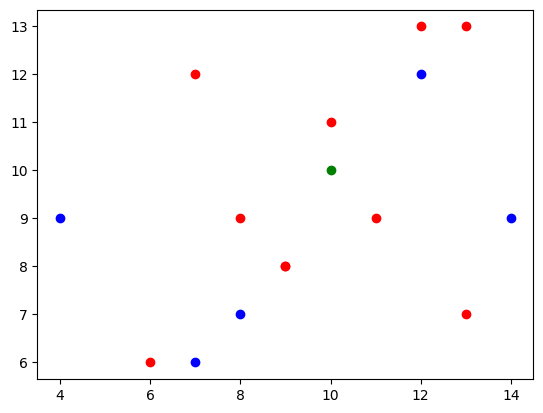

<class 'list'>
<class 'list'>
<class 'list'>
[(8, 7), (7, 6), (12, 12), (14, 9), (4, 9)]


In [334]:
source= [(10, 10)]

nodes =[(11,9),(12,13),(13,13),(6,6),(10,11),(9,8),(7,12),(13,7),(9,8),(8,9)]
loc = create_delivary((4,4),(16,16),5)
# loc= [(5.165232746449021, 2.4300118237546946), (2.283543049903309, 15.299025305438425), [10.23435020354072, 1.176938270587482], [12.565730162543094, 10.305885065409498], [14.083713815330754, 2.821310708713302]]



plt.scatter(*zip(*loc), color='blue')
plt.scatter(*zip(*nodes), color='red')
plt.scatter(*zip(*source), color='green')

plt.show()

print(type(loc))
print(type(nodes))
print(type(source))
print(loc)


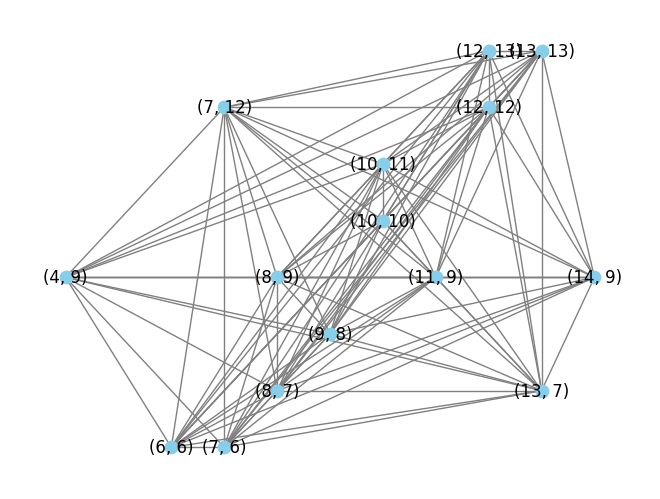

In [335]:
import itertools
import math

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_nodes_from(source)
G.add_nodes_from(loc)



for node1, node2 in itertools.combinations(G.nodes(), 2):
    if (node1 in source or node1 in nodes) and (node2 in source or node2 in nodes):
        # distance = math.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)
        G.add_edge(node1, node2)
    if (node1 in nodes or node1 in loc) and (node2 in nodes or node2 in loc):
        # distance = math.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)
        G.add_edge(node1, node2)

# shortest_paths = nx.multi_source_dijkstra(G, sources=[source], target=loc)

    
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=80, edge_color='gray', linewidths=1, font_size=12)





Shortest paths from (10, 10) to all delivery locations:
(8, 7): distance = 3.6502815398728847, path = [(10, 10), (9, 8), (8, 7)]
(7, 6): distance = 5.06449510224598, path = [(10, 10), (9, 8), (7, 6)]
(12, 12): distance = 3.23606797749979, path = [(10, 10), (10, 11), (12, 12)]
(14, 9): distance = 4.414213562373095, path = [(10, 10), (11, 9), (14, 9)]
(4, 9): distance = 6.23606797749979, path = [(10, 10), (8, 9), (4, 9)]


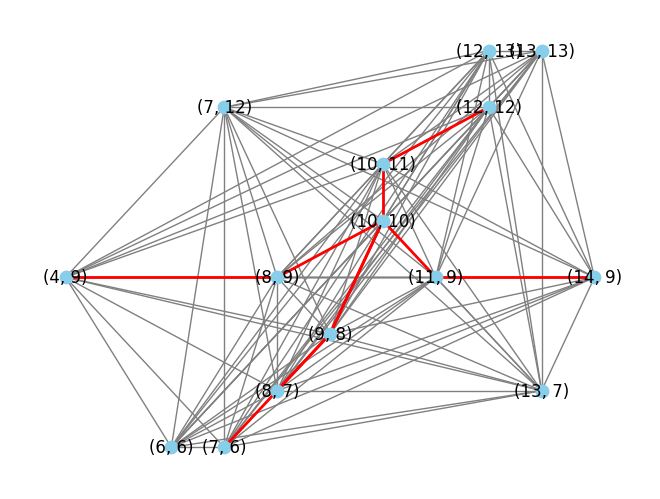

In [336]:
all_shortest_paths = nx.all_pairs_dijkstra(G, weight=distance_function)

pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=80, edge_color='gray', linewidths=1, font_size=12)

# Print shortest paths from source to delivery locations
for target_node, (distances, paths) in all_shortest_paths:
    if target_node == source[0]:
        print(f"Shortest paths from {source[0]} to all delivery locations:")
        for loc_node in loc:
            print(f"{loc_node}: distance = {distances[loc_node]}, path = {paths[loc_node]}")
            
            # Highlight the shortest path between source and loc_node
            shortest_path_edges = [(paths[loc_node][i], paths[loc_node][i+1]) for i in range(len(paths[loc_node])-1)]
            nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)


In [337]:
# shortest_paths = {}
# for l in loc:
#     shortest_paths[l] = nx.shortest_path(G, source=source[0], target=l)

# # Print shortest paths
# for l, path in shortest_paths.items():
#     print(f"Shortest path from {source[0]} to {l}: {path}")